In [1]:
data(AirPassengers)

In [2]:
class(AirPassengers)

[1] "ts"

In [3]:
AirPassengers

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

In [4]:
frequency(AirPassengers)

[1] 12

In [5]:
summary(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

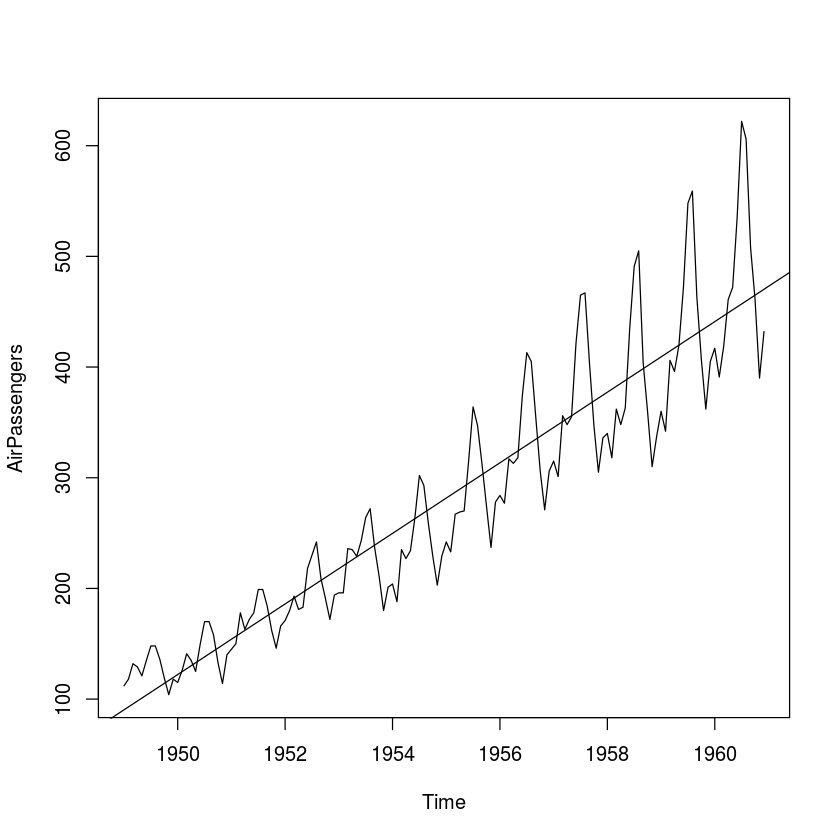

In [8]:
plot(AirPassengers)
abline(reg=lm(AirPassengers~time(AirPassengers)))

In [9]:
cycle(AirPassengers)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949   1   2   3   4   5   6   7   8   9  10  11  12
1950   1   2   3   4   5   6   7   8   9  10  11  12
1951   1   2   3   4   5   6   7   8   9  10  11  12
1952   1   2   3   4   5   6   7   8   9  10  11  12
1953   1   2   3   4   5   6   7   8   9  10  11  12
1954   1   2   3   4   5   6   7   8   9  10  11  12
1955   1   2   3   4   5   6   7   8   9  10  11  12
1956   1   2   3   4   5   6   7   8   9  10  11  12
1957   1   2   3   4   5   6   7   8   9  10  11  12
1958   1   2   3   4   5   6   7   8   9  10  11  12
1959   1   2   3   4   5   6   7   8   9  10  11  12
1960   1   2   3   4   5   6   7   8   9  10  11  12

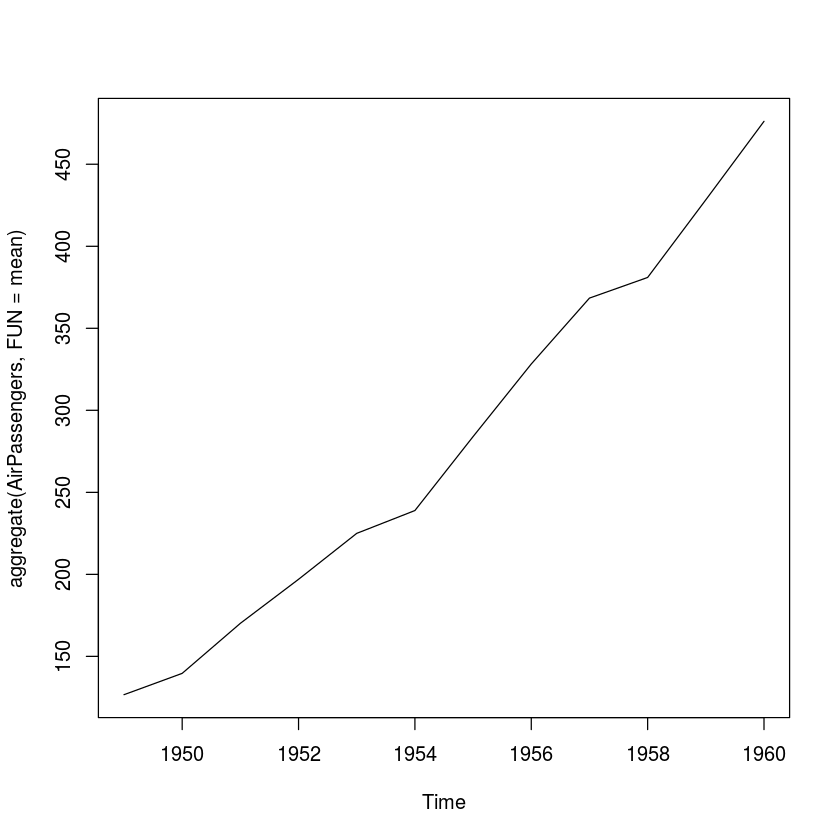

In [10]:
plot(aggregate(AirPassengers,FUN=mean))

In [11]:
boxplot(AirPassengers~cycle(AirPassengers))

In [12]:
AirPassengers

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

In [14]:
myts <- AirPassengers

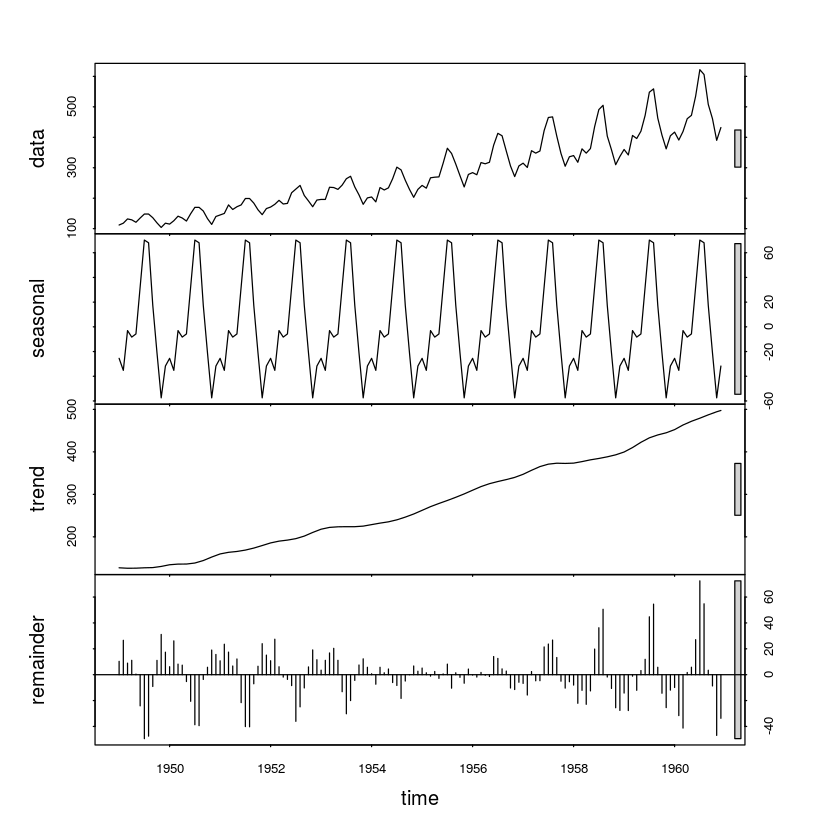

In [15]:
fit <- stl(myts, s.window="period")
plot(fit)


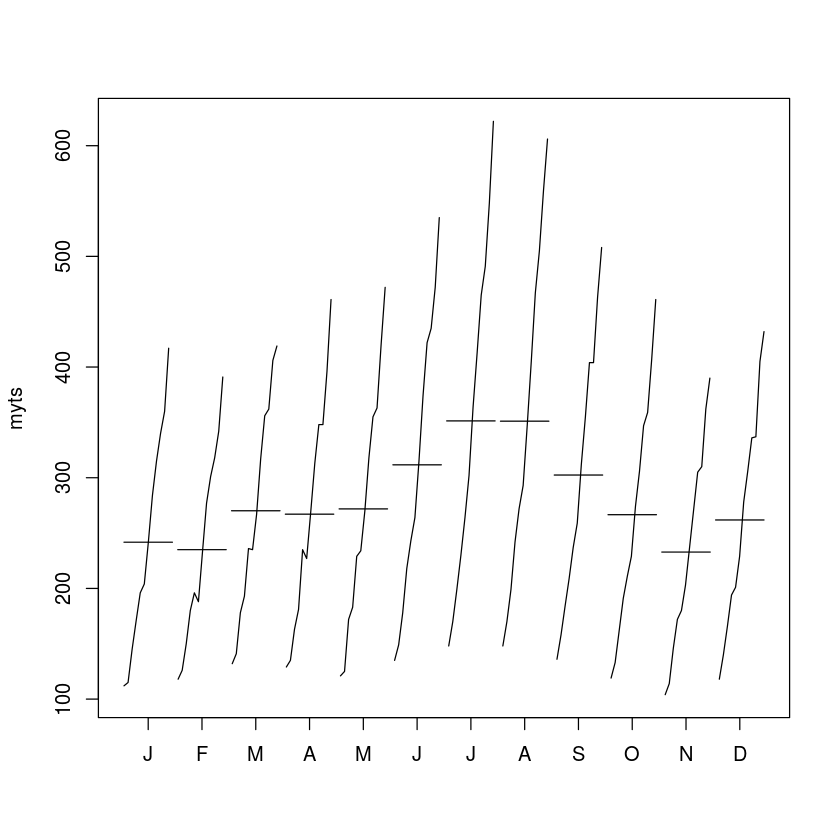

In [16]:

# additional plots
monthplot(myts)


In [19]:
install.packages("forecast")

also installing the dependencies ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘uroot’, ‘RcppArmadillo’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


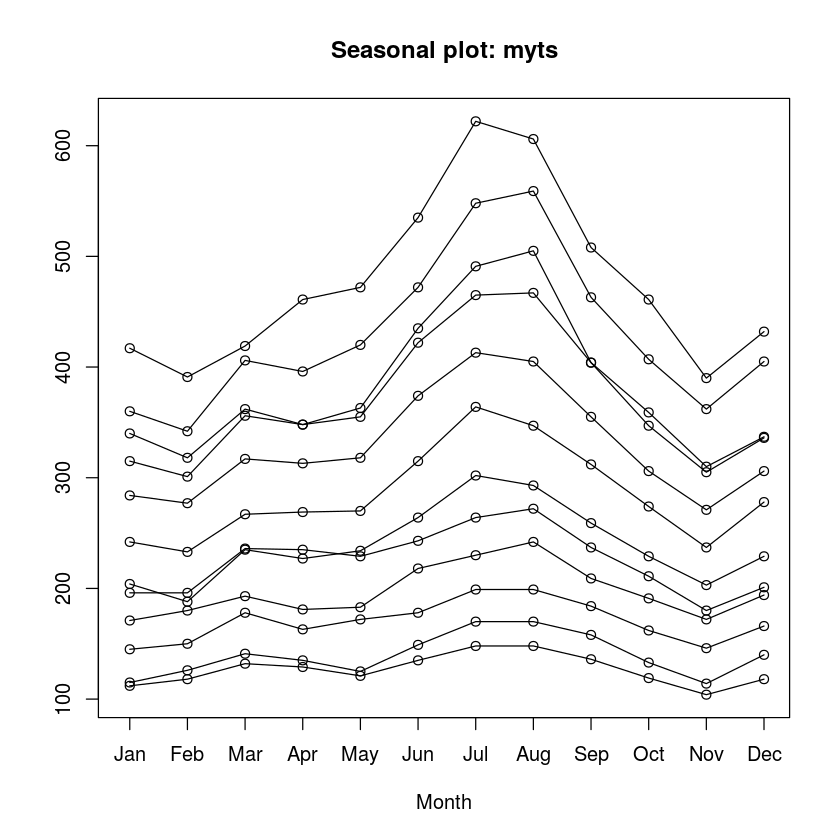

In [20]:
library(forecast)
seasonplot(myts)

In [27]:
# simple exponential - models level
fit <- HoltWinters(myts, beta=FALSE, gamma=FALSE)
accuracy(forecast(fit))

ME       RMSE     MAE      MPE       MAPE     MASE      ACF1     
Training set 2.237891 33.71109 25.86061 0.3783815 9.019603 0.8073795 0.3029018

In [28]:
# double exponential - models level and trend
fit <- HoltWinters(myts, gamma=FALSE)
accuracy(forecast(fit))

ME      RMSE     MAE      MPE       MAPE     MASE      ACF1     
Training set -3.0685 33.94632 25.93371 -1.958604 9.166852 0.8096618 0.3024913

In [40]:
# triple exponential - models level, trend, and seasonal components
fit <- HoltWinters(myts)
accuracy(forecast(fit))

ME       RMSE     MAE      MPE       MAPE     MASE      ACF1    
Training set 1.753445 12.86886 9.774438 0.3992849 3.400129 0.3051622 0.424139

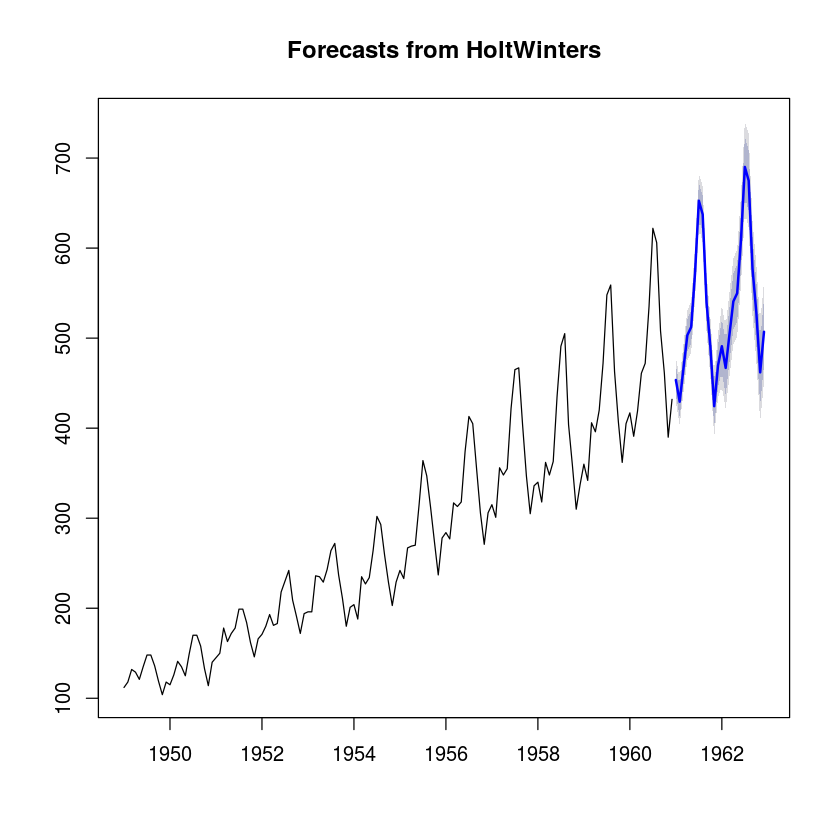

In [41]:
plot(forecast(fit))

In [37]:
# fit an ARIMA model of order P, D, Q
fit <- arima(myts, order=c(2,1,1))
accuracy(forecast(fit))

ME       RMSE     MAE      MPE      MAPE     MASE      ACF1       
Training set 6.376375 28.96106 22.69575 1.817697 7.924341 0.7085711 -0.08006484

In [39]:
plot(forecast(fit))

ME       RMSE     MAE      MPE       MAPE     MASE      ACF1      
Training set 1.567359 10.74726 7.791605 0.4357799 2.857917 0.2432573 0.03945056

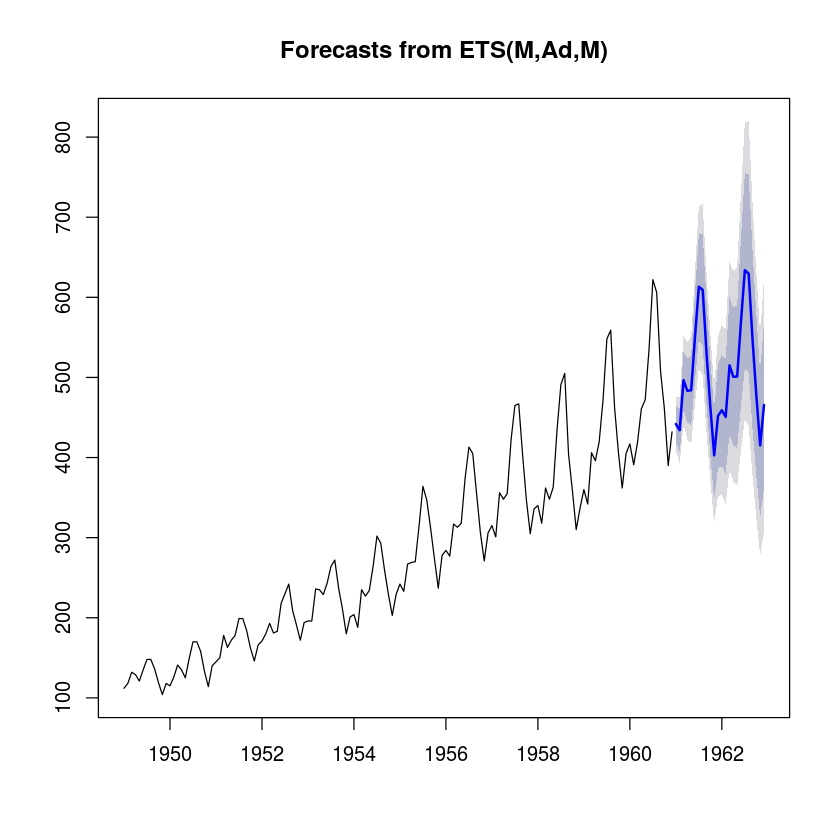

In [42]:
fit <- ets(myts)
accuracy(forecast(fit))
plot(forecast(fit))

In [43]:
# Automated forecasting using an ARIMA model
fit <- auto.arima(myts)
accuracy(forecast(fit))
plot(forecast(fit))

ME       RMSE     MAE     MPE       MAPE     MASE     ACF1        
Training set 1.342299 10.84619 7.86754 0.4206976 2.800458 0.245628 -0.001248475

In [44]:
library(zoo)



Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [119]:
data <- read.zoo(file = '/tmp/state_po_quarterly.csv', sep = ",", header = TRUE, 
       index = 1, tz = "", format = "%Y-%m-%d")

In [120]:
ts_dates<- index(data)
ts_values<- as.numeric(data$NY)
ts_monthly<- ts(ts_values, frequency = 4)


ME        RMSE     MAE      MPE       MAPE      MASE     
Training set 0.1568921 1.382436 1.069231 0.1247365 0.6592966 0.1550659
             ACF1     
Training set 0.1656797

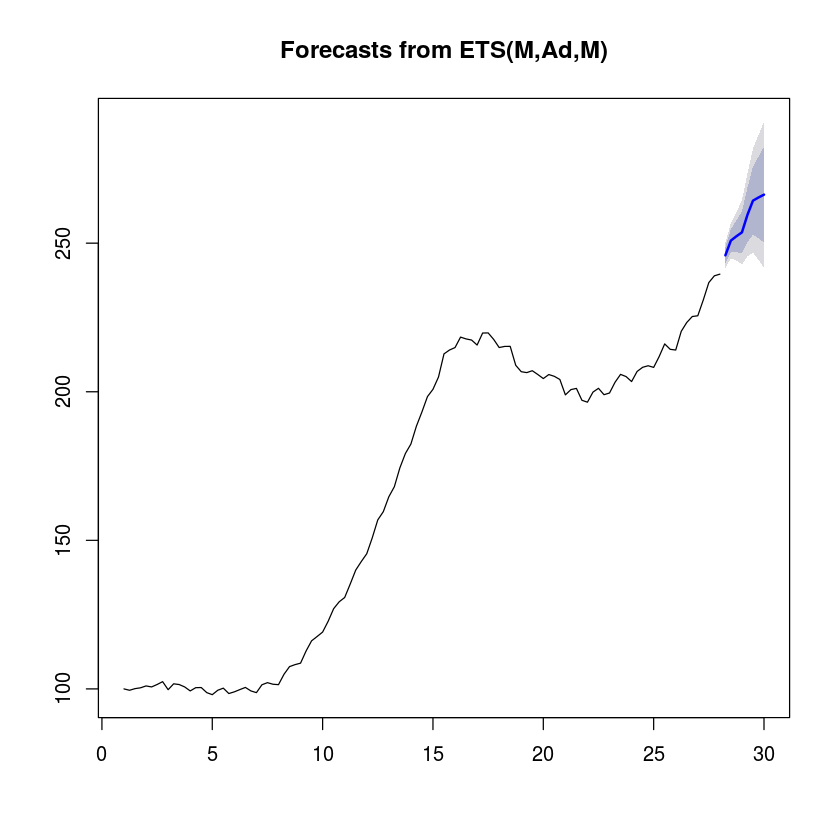

In [121]:
fit <- ets(ts_monthly)
accuracy(forecast(fit))
plot(forecast(fit))

ME        RMSE     MAE      MPE       MAPE      MASE     
Training set 0.2406513 1.425718 1.081474 0.1588757 0.6606523 0.1568414
             ACF1       
Training set -0.02084841

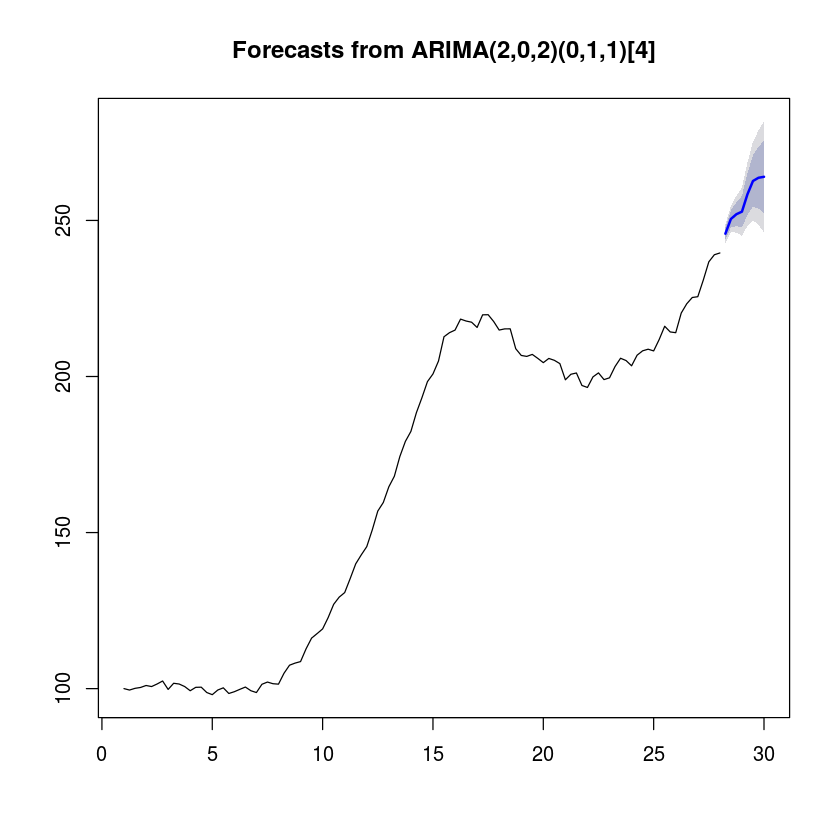

In [122]:
fit <- auto.arima(ts_monthly)
accuracy(forecast(fit))
plot(forecast(fit))

In [49]:
data <- read.zoo(file = '/tmp/div_po_monthly.csv', sep = ",", header = TRUE, 
       index = 1, tz = "", format = "%Y-%m-%d")

In [72]:
ts_dates<- index(data)
ts_values<- as.numeric(data$ENC)
ts_monthly<- ts(ts_values, frequency = 12)


In [75]:
plot(ts_monthly)
abline(reg=lm(ts_monthly~time(ts_monthly)))

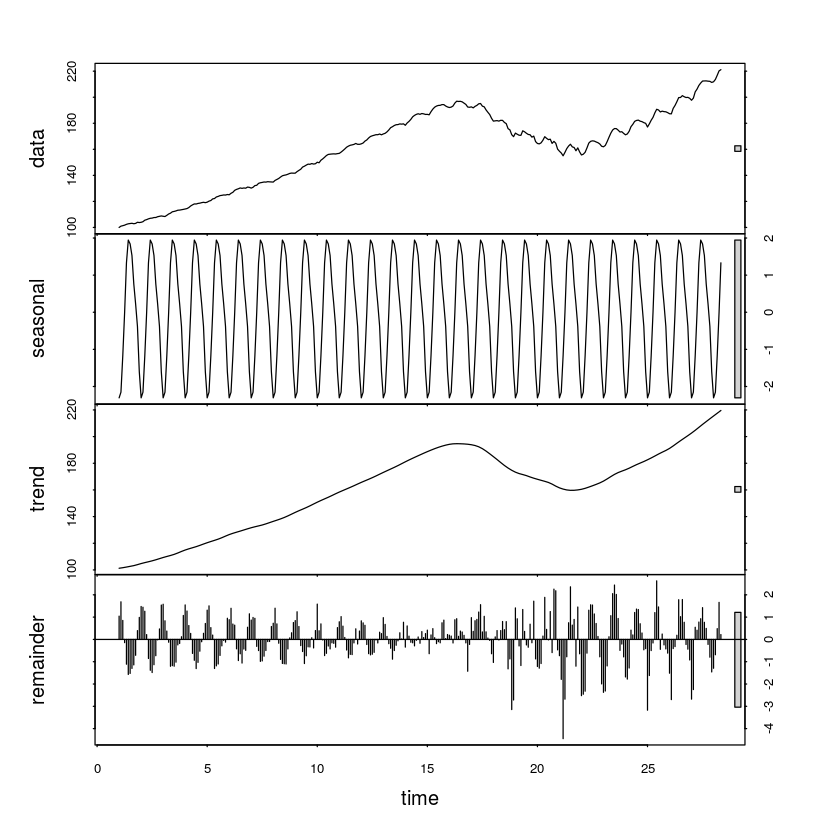

In [76]:
fit <- stl(ts_monthly, s.window="period")
plot(fit)


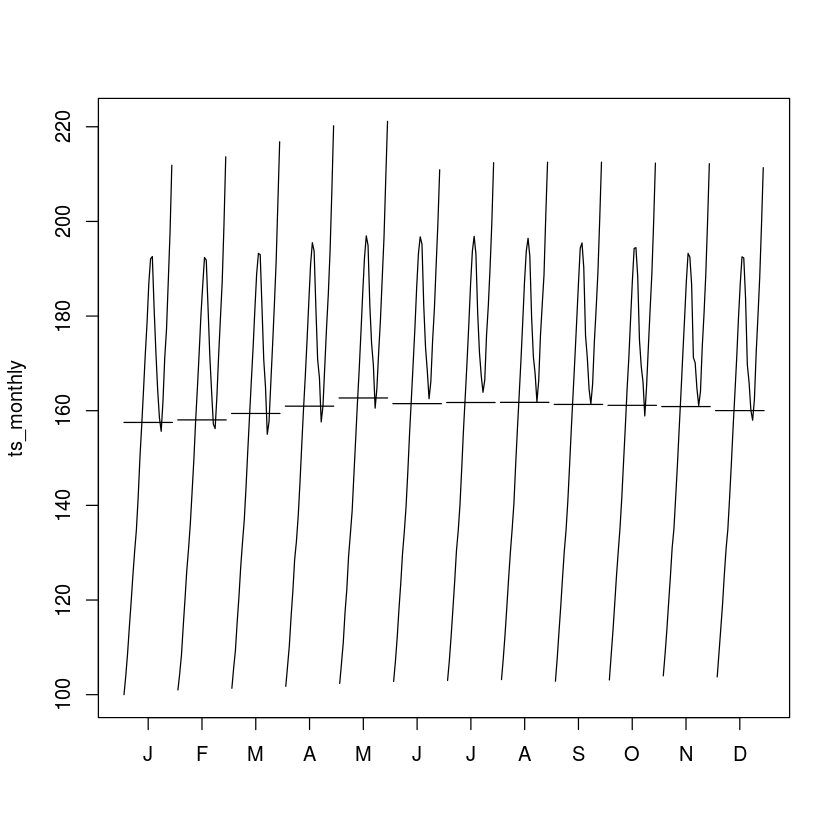

In [77]:
monthplot(ts_monthly)


In [89]:
ts_dates<- index(data)
ts_values<- as.numeric(data$WSC)
ts_monthly<- ts(ts_values, frequency = 12)


ME        RMSE      MAE       MPE        MAPE      MASE     
Training set 0.1474917 0.9400593 0.6563815 0.08410885 0.3733641 0.0929748
             ACF1       
Training set -0.07178886

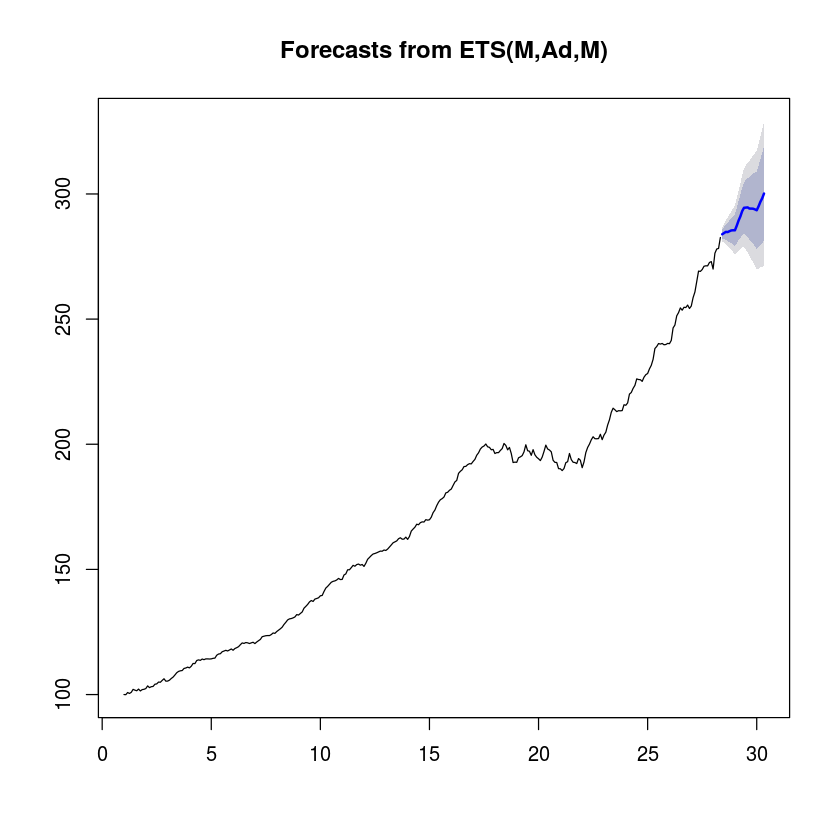

In [91]:
fit <- ets(ts_monthly)
accuracy(forecast(fit))
plot(forecast(fit))

In [92]:
fit <- auto.arima(ts_monthly)
accuracy(forecast(fit))
plot(forecast(fit))

ME        RMSE      MAE       MPE        MAPE      MASE      
Training set 0.0407914 0.9136942 0.6327523 0.02373511 0.3535288 0.08962778
             ACF1       
Training set -0.04653468

In [123]:
data <- read.zoo(file = '/tmp/pv_zip3_hpi.csv', sep = ",", header = TRUE, 
       index = 1, tz = "", format = "%Y")

In [133]:
ts_dates<- index(data)
ts_values<- as.numeric(data$X076)
ts_monthly<- ts(ts_values, frequency = 1)


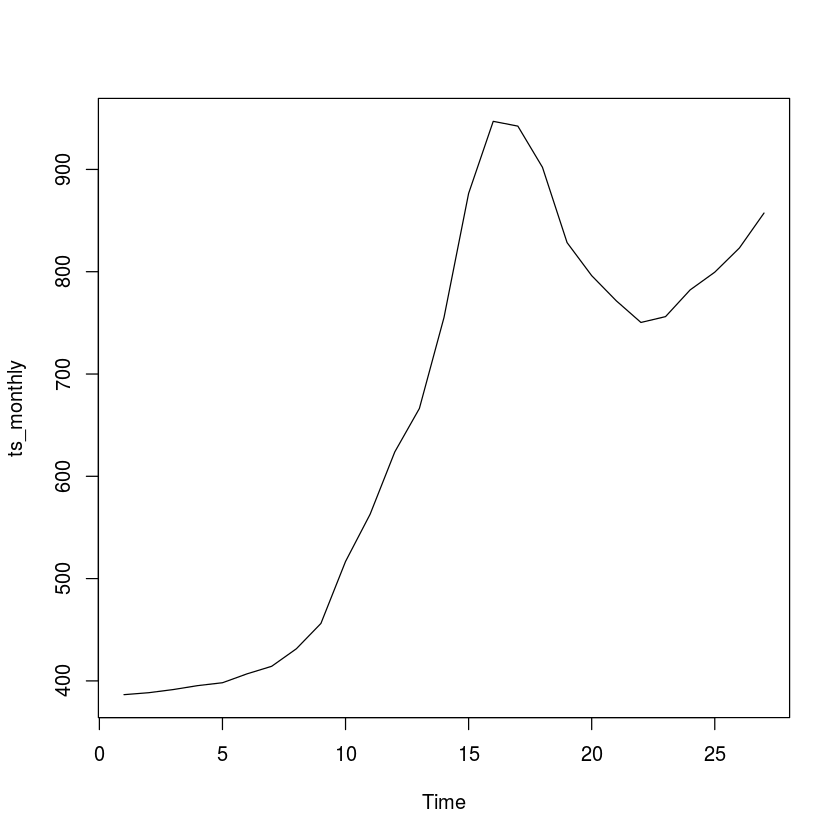

In [134]:
plot(ts_monthly)

In [135]:
fit <- ets(ts_monthly)
accuracy(forecast(fit))
plot(forecast(fit))

ME        RMSE     MAE      MPE       MAPE     MASE      ACF1     
Training set 0.7387259 26.74137 19.35935 0.3085491 2.642216 0.5825527 0.2880792

ME       RMSE     MAE      MPE       MAPE     MASE     
Training set 5.311273 23.24703 17.07076 0.9537474 2.395484 0.5136856
             ACF1       
Training set -0.02926635

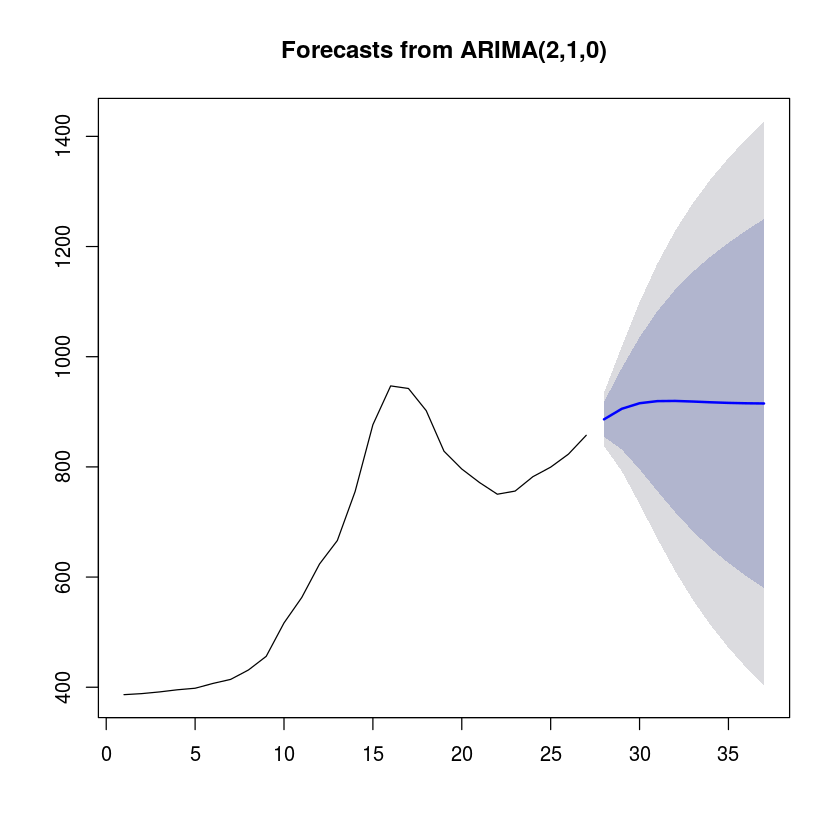

In [136]:
fit <- auto.arima(ts_monthly)
accuracy(forecast(fit))
plot(forecast(fit))

In [137]:
forecast(fit,1)

   Point Forecast    Lo 80    Hi 80    Lo 95   Hi 95
28       886.3457 854.7463 917.9452 838.0185 934.673

In [138]:
ts_monthly

Time Series:
Start = 1 
End = 27 
Frequency = 1 
 [1] 386.54 388.45 391.53 395.41 398.20 406.91 414.30 431.36 456.17 516.76
[11] 563.00 623.81 666.32 755.26 876.56 947.01 942.33 902.07 828.45 796.15
[21] 771.54 750.40 756.11 782.24 799.56 823.19 857.35

In [140]:
forecast(fit)

   Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
28       886.3457 854.7463  917.9452 838.0185  934.673
29       905.4635 831.4416  979.4855 792.2567 1018.670
30       915.5465 795.7845 1035.3085 732.3863 1098.707
31       919.3741 756.2140 1082.5342 669.8423 1168.906
32       919.7262 717.8754 1121.5771 611.0220 1228.430
33       918.6287 683.1200 1154.1374 558.4492 1278.808
34       917.2642 652.4972 1182.0312 512.3380 1322.190
35       916.1657 625.6270 1206.7044 471.8251 1360.506
36       915.4690 601.7887 1229.1493 435.7364 1395.202
37       915.1177 580.2469 1249.9886 402.9770 1427.258

In [275]:
inputfile <- '/tmp/pv_zip3_hpi.csv'
outputfile <- '/tmp/pv_zip3_hpi.csv.foreast'

nfreq <- 1
bplot <- TRUE
nthread <- 2

In [276]:
if (nfreq==1) {
    date_format="%Y"
    nforeast=1
} else {
    date_format="%Y-%m-%d"
    nforeast=12
}

In [277]:
data <- read.zoo(file = inputfile, sep = ",", header = TRUE, 
       index = 1, tz = "", format = date_format)

In [278]:
library(parallel)

In [280]:
allnames=colnames(data)

In [281]:
stopCluster(cl)


In [282]:
cl <- makeCluster(nthread)
clusterExport(cl=cl, varlist=c('allnames','data','index',"auto.arima",'forecast','nforeast'))


In [283]:
cl

socket cluster with 2 nodes on host ‘localhost’

In [284]:
run_one=function(i){
    name=allnames[i]
    #print(name)
    if (i%%50==0){
        cat(i)
        cat(",")
    }
    ts_dates<- index(data)
    ts_values<- as.numeric(data[,name])
    myts <- ts(ts_values, frequency = 1)
    fit <- auto.arima(myts)
    #print(accuracy(forecast(fit)))
    #if (bplot){    plot(forecast(fit))}
    pred <- as.vector(forecast(fit,nforeast)$mean)
    return(pred)
}

In [291]:
na.fill(z, c("extend", NA))
na.fill(z, -(1:3))
na.fill(z, list(NA, NULL, NA)

In [285]:
class(a[1])

[1] "list"

In [286]:
a <- parLapply(cl, seq_along(allnames), run_one)

In [287]:
yhat <- do.call(cbind, a)

In [288]:
dim(yhat)

[1]   1 240

In [289]:
write.table(yhat, file=outputfile, row.names=FALSE, col.names=FALSE, sep=",")